# Exploring the IMDB-B dataset

As an example for graph datasets

IMDB-B dataset: https://dl.acm.org/doi/pdf/10.1145/2783258.2783417

Obtained using the [dgl library](https://www.dgl.ai/)


In [2]:
from dgl.data.tu import TUDataset
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


dataset = TUDataset("IMDB-BINARY")

## What does the dataset contain?

It contains a set of graphs with a binary label and an unweighted undirected adjacency matrix. 

Unlike to how it may seem, a graph does not represent a movie but instead an ego network centered around a specific actor/actress.
If the ego network belongs to the action-movie context, it has a 0 label, if it belongs to the romance-movie context, it has a 1 label. 

Number of graphs: 1000
Number of classes: 2

Graph No 0 with label "Action" (0)
Amount of actors/actresses: 20
Percentage of connections: 38.42
Amount of actresses that have co-starred with all other actresses

Graph No 1 with label "Action" (0)
Amount of actors/actresses: 32
Percentage of connections: 25.81
Amount of actresses that have co-starred with all other actresses

Graph No 2 with label "Action" (0)
Amount of actors/actresses: 21
Percentage of connections: 38.57
Amount of actresses that have co-starred with all other actresses

Graph No 3 with label "Action" (0)
Amount of actors/actresses: 35
Percentage of connections: 22.35
Amount of actresses that have co-starred with all other actresses

Graph No 4 with label "Action" (0)
Amount of actors/actresses: 14
Percentage of connections: 61.54
Amount of actresses that have co-starred with all other actresses

Graph No 5 with label "Action" (0)
Amount of actors/actresses: 63
Percentage of connections: 10.8
Amount of actresses that ha

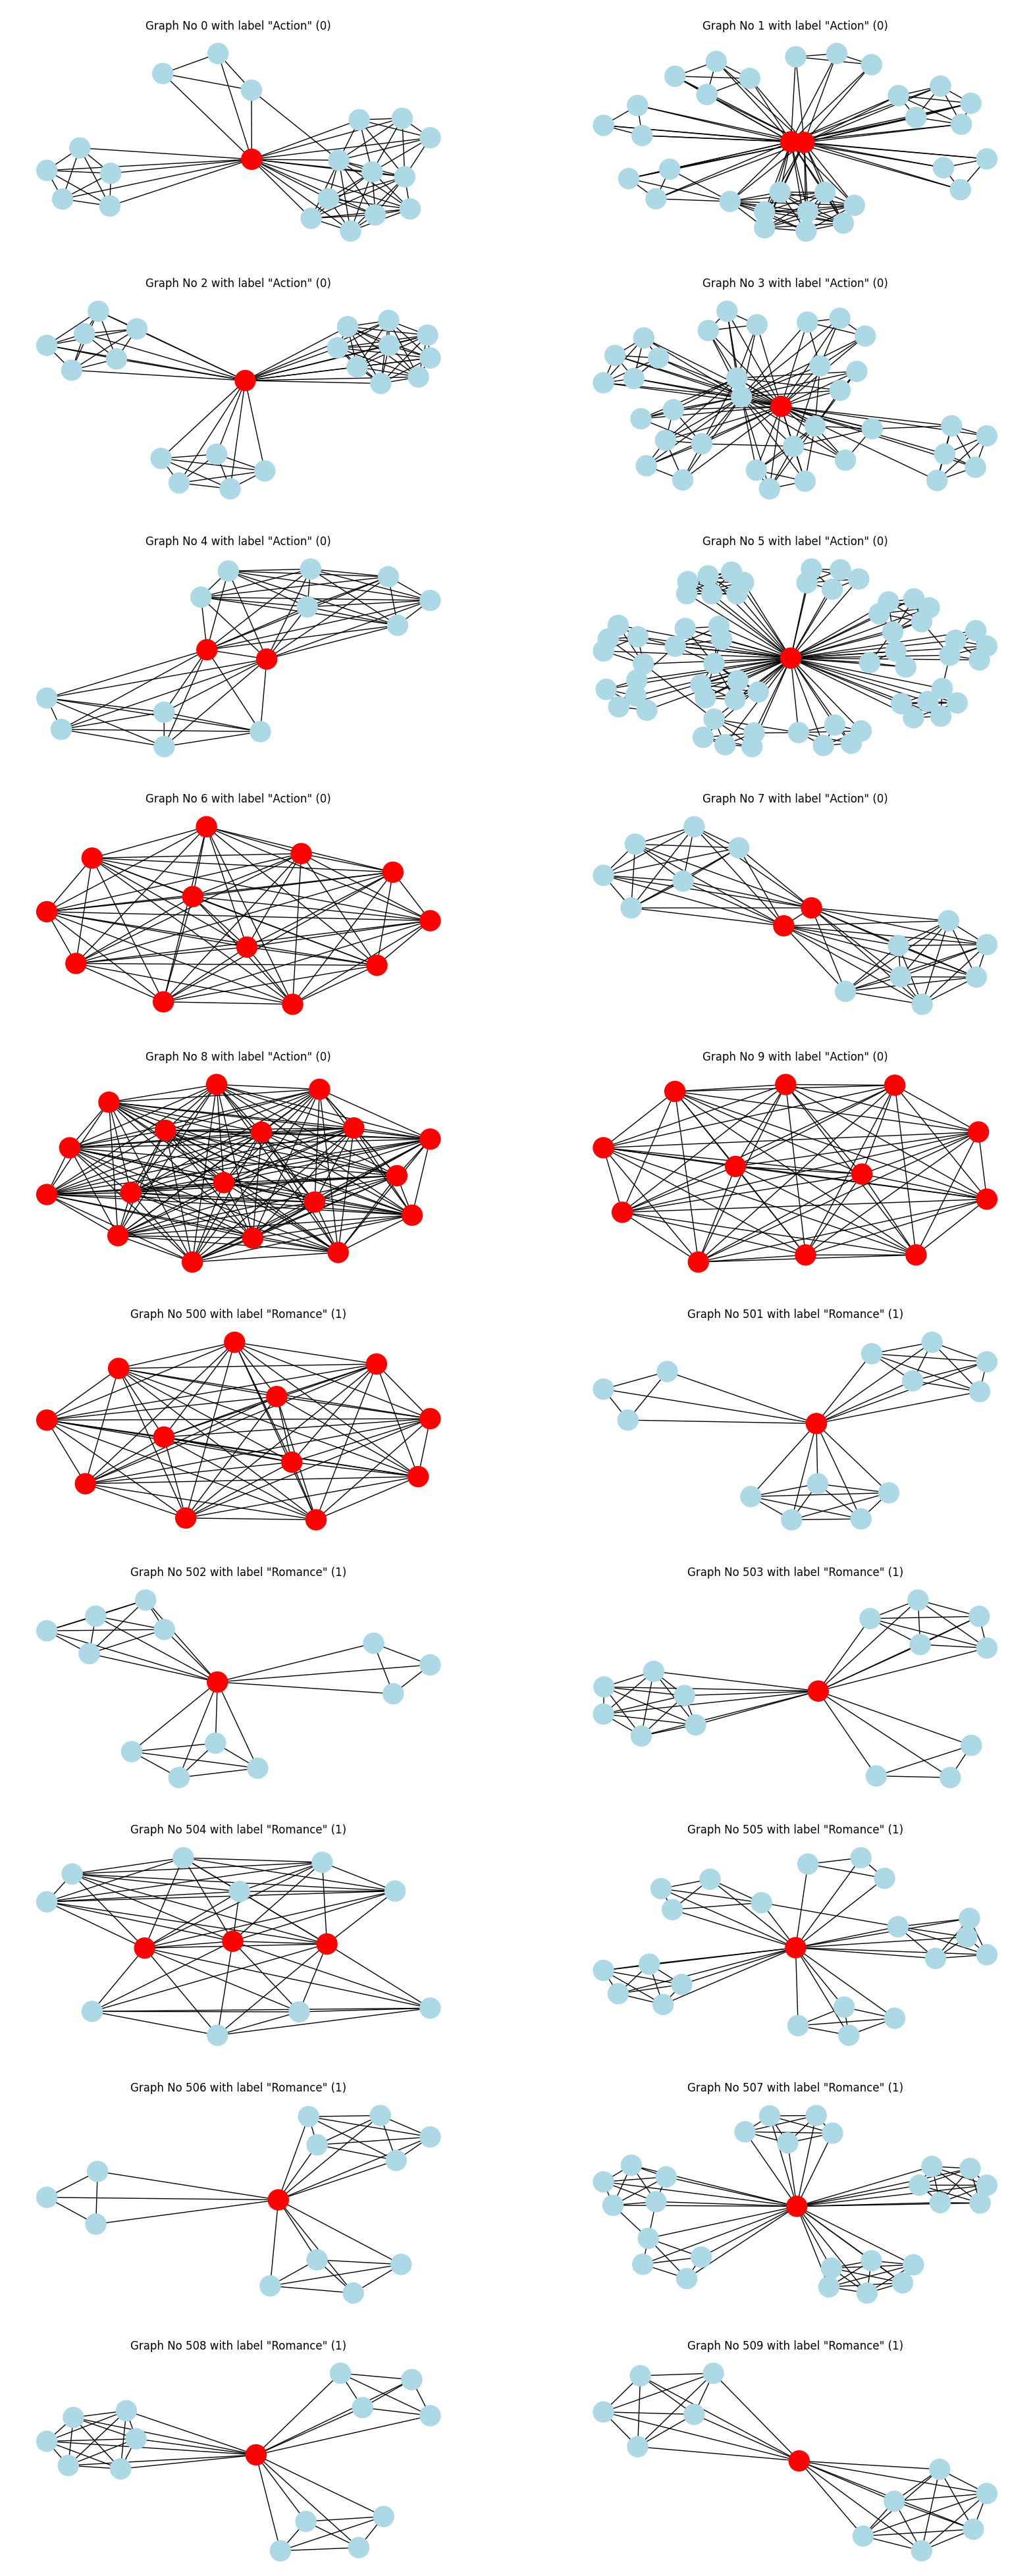

In [29]:
labels = ["Action", "Romance"]

print("Number of graphs:", len(dataset))
print("Number of classes:", dataset.num_classes)

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 50))

axes = axes.flatten()

# Extract data from each graph
graph_data = []
for plot_index, dataset_index in enumerate(np.concatenate((np.argwhere(dataset.graph_labels == 0)[0, :10], np.argwhere(dataset.graph_labels == 1)[0, :10]))):
    graph, label = dataset[dataset_index]
        
    title = f"\nGraph No {dataset_index} with label \"{labels[label[0]]}\" ({label[0]})"
    print(title)
    adj = graph.adjacency_matrix().to_dense().numpy()
    print("Amount of actors/actresses:", adj.shape[0])
    print("Percentage of connections:", round(100 * np.sum(adj) / (adj.shape[0] ** 2 - adj.shape[0]), 2))
    
    universal_nodes = np.floor(np.sum(adj, axis=0) / (adj.shape[0] - 1))
    print("Amount of actresses that have co-starred with all other actresses")
    colors = ["red" if i == 1 else "lightblue" for i in universal_nodes]
    
    nx.draw(nx.from_numpy_array(adj), ax=axes[plot_index], with_labels=False, node_color=colors, node_size=500)
    axes[plot_index].set_title(title)

plt.show()